### ifft() of real array is hermitian-symmetric, i.e. the positive wavenumbers are conjugate of negative wavenumbers

In the following Exercise - fft() and rff() are used to understand their implementation. The fourier domain input of irfft only needs to include the data from positive wavenumbers, making computations faster and easier.

#### 1D

In [1]:
import numpy as np
from numpy.fft import fft, ifft, rfft, irfft, fft2, ifft2, rfft2, irfft2

a = np.random.rand(6)
a_hat_rfft = rfft(a)
a_hat_fft = fft(a)

print('Output of fft and rfft: Output of rfft does not include complex conjugates')
print('a_hat_rfft = ', np.round(a_hat_rfft, 2))
print('a_hat_fft  = ', np.round(a_hat_fft, 2))

print('irfft and ifft of can be same, needs to provide the size of the output')
a_rifft = irfft(a_hat_fft, n=6)
a_ifft = ifft(a_hat_fft)

print('a_rifft = ', np.round(a_rifft, 2))
print('a_ifft  = ', np.round(a_ifft, 2).real)

# Padding zeros rfft
print('rfft: Testing manually padding zeros vs padded by irfft: Zeros will automatically be padded when the size of the output is indicated')
a_hat_rfft_pad = np.insert(a_hat_rfft, 4, 0)
print('a_rfft_pad = ', np.round(irfft(a_hat_rfft_pad), 2))
print('a_rfft_pad = ', np.round(irfft(a_hat_rfft, n=8), 2))
print(np.allclose(irfft(a_hat_rfft,n=8), irfft(a_hat_rfft_pad)))

# Padding zeros fft
a_hat_fft_pad = np.insert(a_hat_fft, 4, [0,0])
# Making conjugate symmteric
a_hat_fft_pad[5] = np.conj(a_hat_fft_pad[3])
print('a_fft_pad = ', np.round(ifft(a_hat_fft_pad).real, 2))
# np.allclose(ifft2(a_hat_fft), ifft(a_hat_fft_pad))

Output of fft and rfft: Output of rfft does not include complex conjugates
a_hat_rfft =  [ 3.44+0.j   -0.19+0.82j -0.44-0.17j -0.12+0.j  ]
a_hat_fft  =  [ 3.44+0.j   -0.19+0.82j -0.44-0.17j -0.12-0.j   -0.44+0.17j -0.19-0.82j]
irfft and ifft of can be same, needs to provide the size of the output
a_rifft =  [0.35 0.45 0.37 0.51 0.95 0.82]
a_ifft  =  [0.35 0.45 0.37 0.51 0.95 0.82]
rfft: Testing manually padding zeros vs padded by irfft: Zeros will automatically be padded when the size of the output is indicated
a_rfft_pad =  [0.25 0.32 0.33 0.25 0.4  0.63 0.75 0.52]
a_rfft_pad =  [0.25 0.32 0.33 0.25 0.4  0.63 0.75 0.52]
True
a_fft_pad =  [0.25 0.32 0.33 0.25 0.4  0.63 0.75 0.52]


#### 2D
Converting output of ftt2 to be compatible with irfft2

In [2]:
# Manually create a 6x6 array and fill it

import numpy as np
np.random.seed(1)

from py2d.dealias import padding_for_dealias
from py2d.initialize import gridgen, initialize_wavenumbers_2DFHIT
from py2d.util import rfft2_to_fft2, fft2_to_rfft2


# Testing for odd and even number of grid points
for Nx in [4, 5]:
    Ny = Nx
    Lx, Ly = 2*np.pi, 2*np.pi
    Lx, Ly, X, Y, dx, dy = gridgen(Lx, Ly, Nx, Ny)

    if Nx % 2 == 0:
        print('**************** Even number of grid points ****************')
    else:
        print('**************** Odd number of grid points ****************')

    # a = np.exp(np.sin(X) + np.cos(3*Y))
    a = np.random.rand(Nx,Ny)

    a_hat_rfft = rfft2(a)
    a_hat_fft = fft2(a)

    a_irfft = irfft2(a_hat_rfft, s=a.shape)
    a_ifft = ifft2(a_hat_fft)

    print('Shape of input data                                                                         ', a.shape)
    print('Shape of rfft2 of input data (Does not contain complex conjugates)                          ', a_hat_rfft.shape)

    # Testing fft2_to_rfft2()
    a_hat_fft2rfft = fft2_to_rfft2(a_hat_fft)
    a_ifft2rfft = irfft2(a_hat_fft2rfft, s=a.shape) # This should be equal to a
    print('Shape of fft2_to_rfft2                                           ', a_hat_fft2rfft.shape)
    print('Testing fft2_to_rfft2(): irfft2 of fft2_to_rfft2() is same as a: ', np.max(np.abs((a- a_ifft2rfft))))


    # Testing rfft2_to_fft2()
    a_hat_rfft2fft = rfft2_to_fft2(a_hat_rfft)
    a_rfft2fft = ifft2(a_hat_rfft2fft) # This should be equal to a
    print('Shape of rfft2_to_fft2                                           ', a_hat_rfft2fft.shape)
    print('Testing rfft2_to_fft2(): ifft2 of rfft2_to_fft2() is same as a: ', np.max(np.abs((a- a_rfft2fft))))

    print(a_hat_fft.round(1))
    print(a_hat_rfft2fft.round(1))
    print((a_hat_fft-a_hat_rfft2fft).round(1))

**************** Even number of grid points ****************
Shape of input data                                                                          (4, 4)
Shape of rfft2 of input data (Does not contain complex conjugates)                           (4, 3)
Shape of fft2_to_rfft2                                            (4, 3)
Testing fft2_to_rfft2(): irfft2 of fft2_to_rfft2() is same as a:  1.1102230246251565e-16
Shape of rfft2_to_fft2                                            (4, 4)
Testing rfft2_to_fft2(): ifft2 of rfft2_to_fft2() is same as a:  1.1102230246251565e-16
[[ 6. +0.j   0.5-0.2j -2.4+0.j   0.5+0.2j]
 [-0.6+1.j   0.9-0.3j -0.2-1.2j -0. +0.8j]
 [ 0.9+0.j   0.3-0.3j  0.4+0.j   0.3+0.3j]
 [-0.6-1.j  -0. -0.8j -0.2+1.2j  0.9+0.3j]]
[[ 6. +0.j   0.5-0.2j -2.4+0.j   0.5+0.2j]
 [-0.6+1.j   0.9-0.3j -0.2-1.2j -0. +0.8j]
 [ 0.9+0.j   0.3-0.3j  0.4+0.j   0.3+0.3j]
 [-0.6-1.j  -0. -0.8j -0.2+1.2j  0.9+0.3j]]
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j

### Contours of fft2 and rfft2

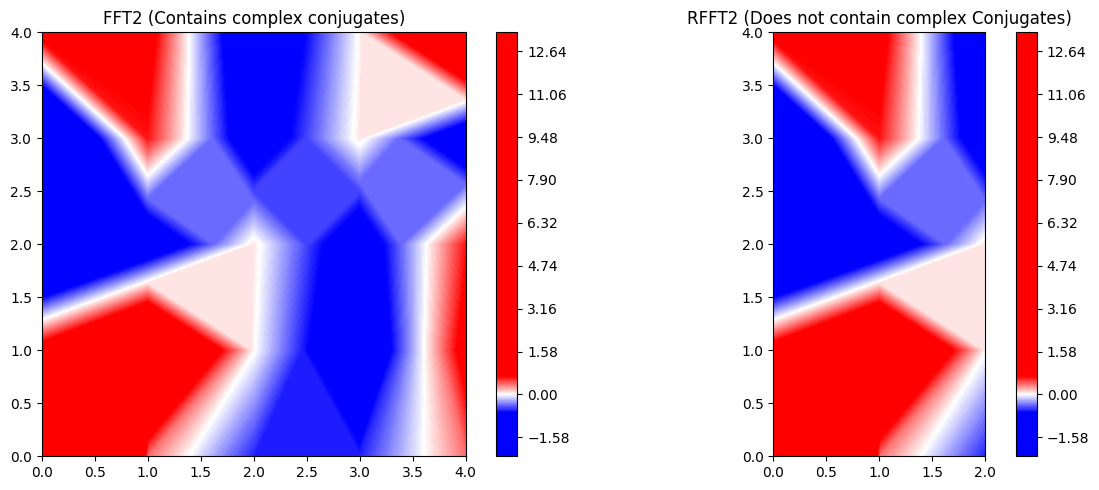

In [3]:
from scipy.io import loadmat
from matplotlib import pyplot as plt

# Load data
Omega_DNS = a 

Omega_DNS_hat_fft = np.fft.fft2(Omega_DNS)
Omega_DNS_hat_rfft2 = np.fft.rfft2(Omega_DNS)

vmax = 5e-2*np.max(Omega_DNS_hat_fft.real)
vmin = -vmax
levels = 1000

# Subplots setup
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row, 2 columns

# --- FFT2 Plot ---
c1 = ax[0].contourf(Omega_DNS_hat_fft.real, vmax=vmax, vmin=vmin, levels=levels, cmap='bwr')
cbar = fig.colorbar(c1, ax=ax[0])
ax[0].set_title('FFT2 (Contains complex conjugates)')
ax[0].set_aspect('equal')

# --- RFFT2 Plot ---
c2 = ax[1].contourf(Omega_DNS_hat_rfft2.real, vmax=vmax, vmin=vmin, levels=levels, cmap='bwr')
cbar = fig.colorbar(c2, ax=ax[1])
ax[1].set_title('RFFT2 (Does not contain complex Conjugates)')
ax[1].set_aspect('equal')

# Ensure figure layout is adjusted
fig.tight_layout()
plt.show()


In [7]:
import numpy as np
import time

def compare_fft_times():
    data = np.random.rand(GRID_SIZE, GRID_SIZE)

    # Time fft2 -> ifft2
    total_time_fft2 = 0
    for _ in range(NUM_ITERATIONS):
        start_time = time.time()
        fft_result = np.fft.fft2(data)
        np.fft.ifft2(fft_result)  # Inverse transform
        elapsed_time = time.time() - start_time
        total_time_fft2 += elapsed_time

    # Time rfft2 -> irfft2
    total_time_rfft2 = 0
    for _ in range(NUM_ITERATIONS):
        start_time = time.time()
        rfft_result = np.fft.rfft2(data)
        np.fft.irfft2(rfft_result)  # Inverse transform
        elapsed_time = time.time() - start_time
        total_time_rfft2 += elapsed_time

    # Print the results
    print(f"Grid size: {GRID_SIZE}")
    print(f"Average fft2 -> ifft2 time: {total_time_fft2 / NUM_ITERATIONS:.5f} seconds")
    print(f"Average rfft2 -> irfft2 time: {total_time_rfft2 / NUM_ITERATIONS:.5f} seconds")

NUM_ITERATIONS = 1000

for GRID_SIZE in  [32, 64, 128, 256, 512, 1024]:

    compare_fft_times()


Grid size: 32
Average fft2 -> ifft2 time: 0.00005 seconds
Average rfft2 -> irfft2 time: 0.00003 seconds
Grid size: 64
Average fft2 -> ifft2 time: 0.00011 seconds
Average rfft2 -> irfft2 time: 0.00006 seconds
Grid size: 128
Average fft2 -> ifft2 time: 0.00030 seconds
Average rfft2 -> irfft2 time: 0.00020 seconds
Grid size: 256
Average fft2 -> ifft2 time: 0.00117 seconds
Average rfft2 -> irfft2 time: 0.00070 seconds
Grid size: 512
Average fft2 -> ifft2 time: 0.00610 seconds
Average rfft2 -> irfft2 time: 0.00314 seconds
Grid size: 1024
Average fft2 -> ifft2 time: 0.02951 seconds
Average rfft2 -> irfft2 time: 0.01274 seconds
